# **DS5110 - Introduction to Data Management and Processing**
## **Fall 2023 Homework Assignment 4**

Submission Instructions:
- Please complete this homework assignment in the same notebook provided.
- Submit your completed assignment on Canvas by the deadline.

Submission Deadline:
**December 11th, 2023**

<p align="justify">
Please read the instructions carefully when answering questions and ensure your code works correctly before submission. The grader will run your code for grading the coding questions without any adjustment.
</p>

In [1]:
#@markdown ### Enter your first and last names below:
First_Name = "Yadhukrishnan" #@param {type:"string"}
Last_Name = "Pankajakshan" #@param {type:"string"}

## **Problem Description**

Financial institutions that lend to consumers rely on models to help decide on who to approve or decline for credit (for lending products such as credit cards, automobile loans, or home loans). In this project, your task is to develop models that review credit card applications to determine which ones should be approved. You are given historical data on response (binary default indicator) and 20 predictor variables from credit card accounts for a hypothetical bank XYZ, a regional bank in the Bay area. There are three datasets available: a [training](https://raw.githubusercontent.com/mh2t/DS5110/main/Homework/HW4-Train.csv) dataset with 20,000 accounts; a [validation](https://raw.githubusercontent.com/mh2t/DS5110/main/Homework/HW4-Validation.csv) dataset with 3,000 accounts, and a **hidden** test dataset with 5,000 accounts. Information about the variables is given in the [Appendix](https://github.com/mh2t/DS5110/blob/main/Homework/HW4-appx.pdf).

You are asked to do the following and also address specific questions below:

* **(10 points)** Do any necessary data pre-processing in preparation for modeling.
* **(20 points)** Develop and fit a logistic regression (LR) model, assess its performance, and interpret the results.
* **(20 points)** Develop an additional model based on a machine learning (ML) algorithm selected from one of the following: Random Forest, Gradient Boosting (XGBoost or another implementation), or Feedforward Neural Network; assess its performance, and make sure to explain why you chose this particular algorithm.
* **(10 points)** Compare the results from the ML algorithm with those from logistic regression model and discuss their advantages and disadvantages; select one of these models for credit approval; and describe the reasons for your selection.
* **(5 points)** Describe what performance metrics you chose to evalaute your proposed models and why.
* **(10 points)** Describe how you would use it to make decisions on future credit card applications.
* **(5 points)** Do customers who already have an account with the financial institution receive any favorable treatment in your model? Support your answer with appropriate analysis.
* **(20 points)** 2-page report.
* You can use any libraries for this homework.



## **Deliverables**

Please submit the following:

1. A report (doc file) that describes all important steps in your data analysis,
model development, comparison of the models, and answer to the specific questions in addition to justification for your final model selection. The body of the report should be no more than 2 pages in length (font size 11 and spacing 1.2).
2. The codes you used for the analysis should have brief but adequate annotations so that we can run it. Using a format of **IPYNB** is mandatory. Clearly indicate the software packages and versions (if appropriate) that you used for the analysis.
3. You are allowed to review textbooks, published papers, websites, and other open literature in preparing for this homework. Note, however, that the material you submit in your report must be based on your own analysis and writing. If you relied on published scholarly work and open-source software for your analysis and findings (beyond what is generally known), you should provide references at the end of the report.


## **Top Model Bonus**

If the evaluation metric of your chosen model achieve the **highest** rank among all submissions, you will be awarded an additional **10 bonus points**. This bonus will be directly applied to your homework 4 score. It's important to note that the performance of your best model will be assessed using a hidden test set, ensuring a fair and unbiased evaluation.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, zscore

## Baseline Modelling

Baseline Model : LogisticRegression
Accuracy: 0.9332794177112819
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      2290
         1.0       0.70      0.17      0.28       183

    accuracy                           0.93      2473
   macro avg       0.82      0.58      0.62      2473
weighted avg       0.92      0.93      0.91      2473

Confusion Matrix:


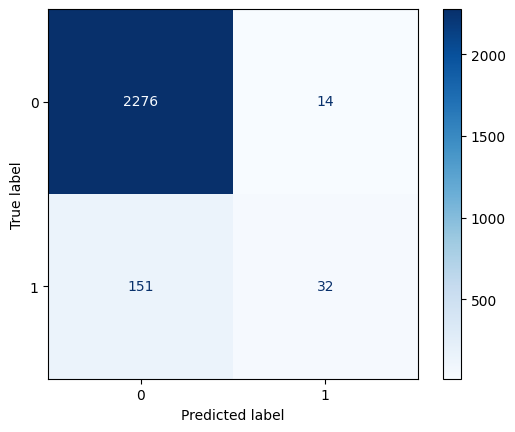

In [3]:
def simple_preprocessing(data, y='Default_ind'):
    if 'States' in data.columns:
        data = pd.get_dummies(data, columns=['States'], drop_first=True)
    
    data = data.dropna(axis=0)

    features = data.drop(y, axis=1)
    target = data[y]

    return features, target

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

X_train, y_train = simple_preprocessing(pd.read_csv('https://raw.githubusercontent.com/mh2t/DS5110/main/Homework/HW4-Train.csv'))
X_valid, y_valid = simple_preprocessing(pd.read_csv('https://raw.githubusercontent.com/mh2t/DS5110/main/Homework/HW4-Validation.csv'))

bmodel = LogisticRegression()
bmodel.fit(X_train, y_train)

y_pred = bmodel.predict(X_valid)

print("Baseline Model : LogisticRegression")
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("Classification Report:\n", classification_report(y_valid, y_pred))
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_valid, y_pred), display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')

In [4]:
# Test baseline model here
x = input("Enter file name: ")
if(x == ''):
    x = "https://raw.githubusercontent.com/mh2t/DS5110/main/Homework/HW4-Validation.csv"
test = pd.read_csv(x)
X_test, y_test = simple_preprocessing(test)
y_pred = bmodel.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

if hasattr(bmodel, 'decision_function'):
    y_score = bmodel.decision_function(X_test)
else:
    y_score = bmodel.predict_proba(X_test)[:, 1]

print("AUROC:",roc_auc_score(y_test, y_pred))

Accuracy: 0.9332794177112819
AUROC: 0.584374925430119


## Data Engineering and Analysis

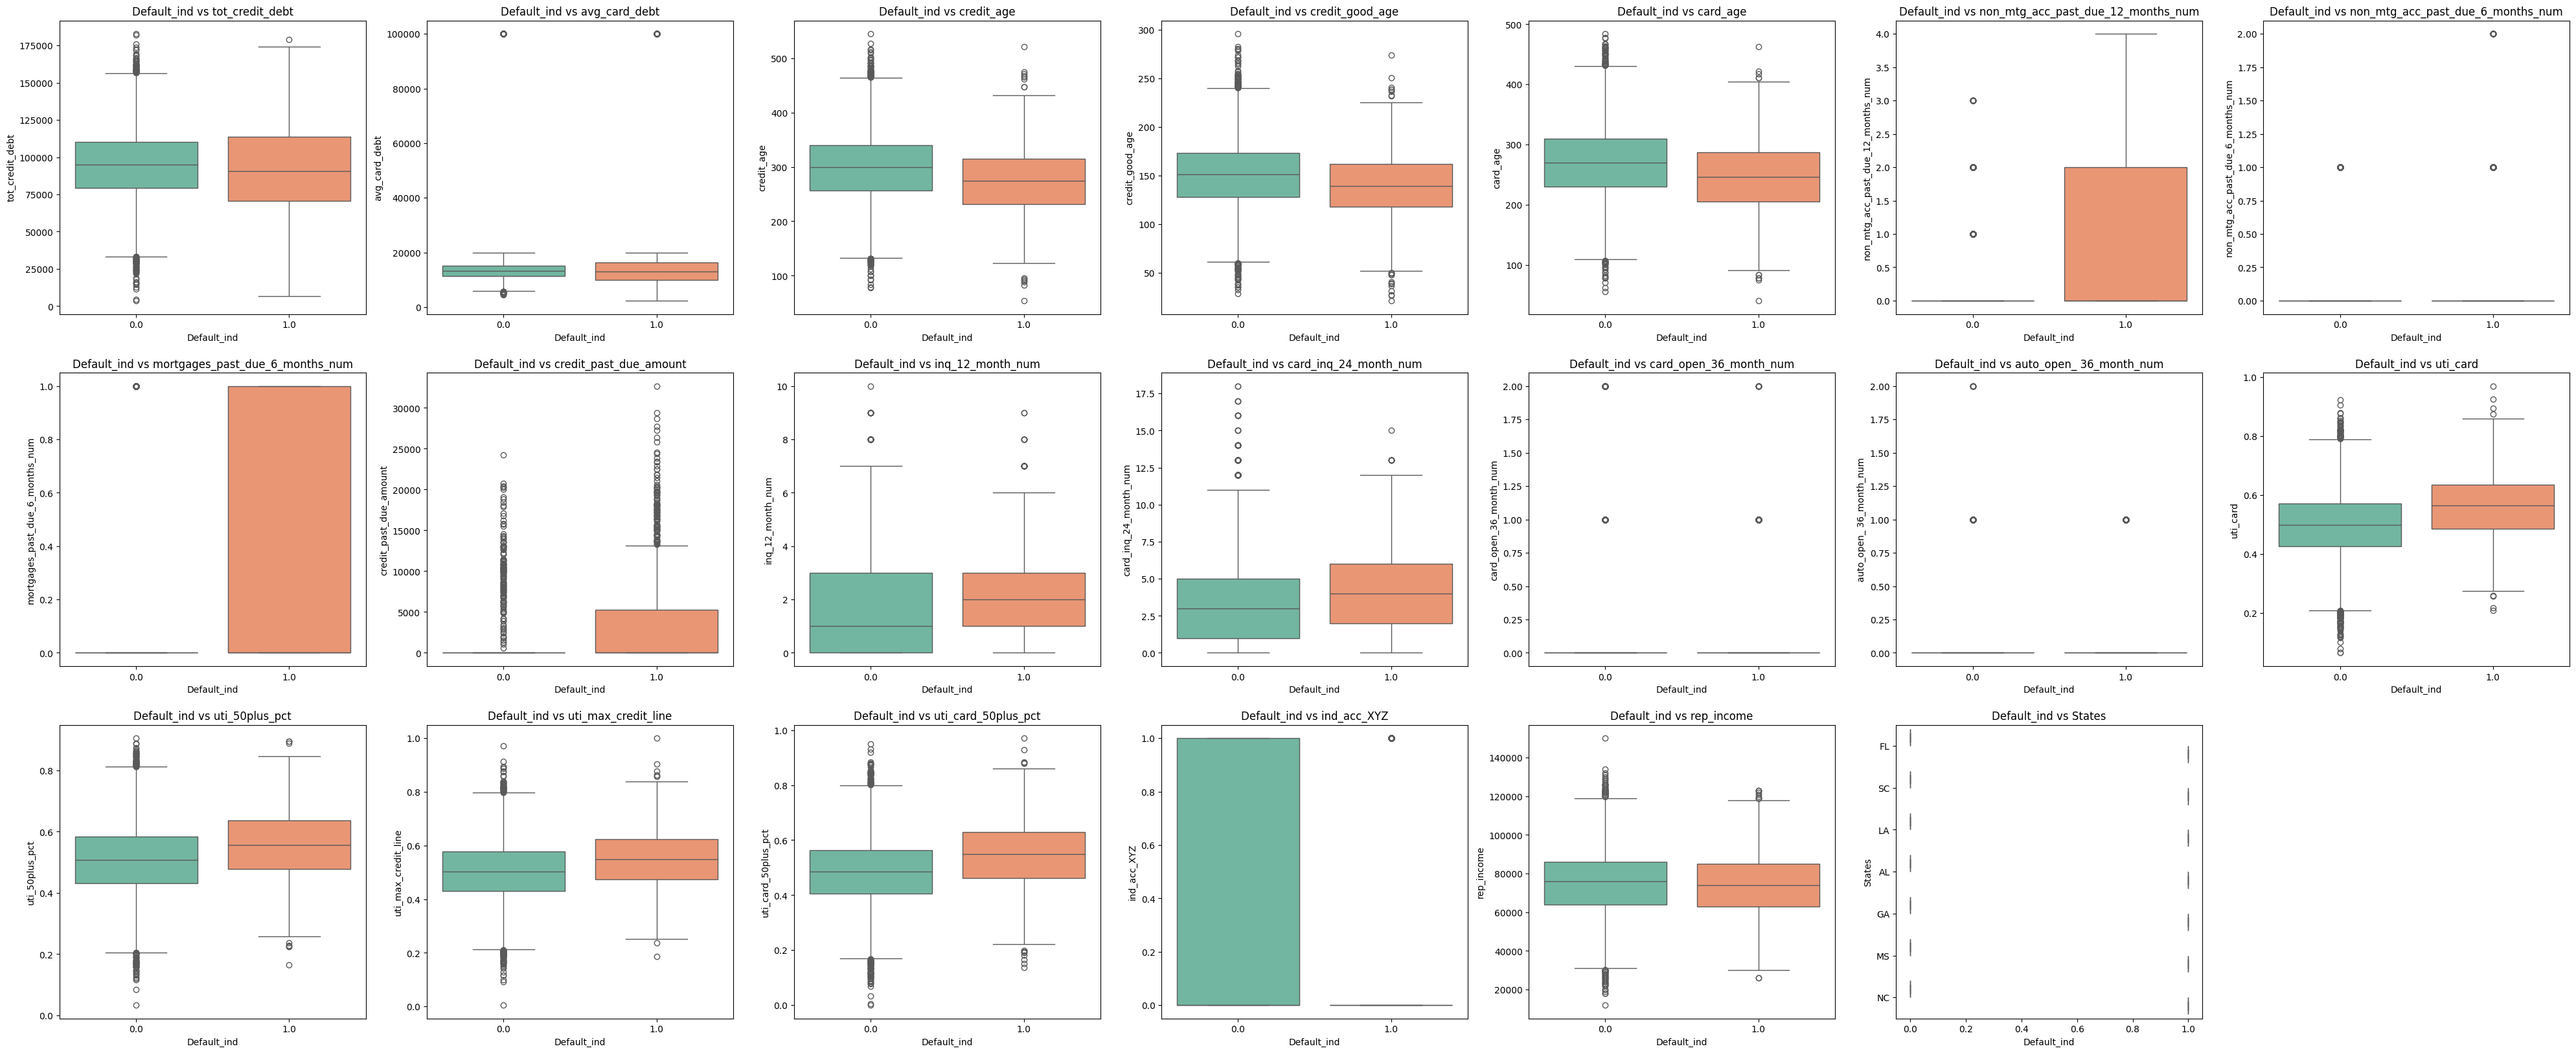

In [5]:
# Checking the variance of the feeatures with Predictors using Box plot 
train = pd.read_csv("https://raw.githubusercontent.com/mh2t/DS5110/main/Homework/HW4-Train.csv")
train.dropna(inplace=True)
plt.rcParams['figure.figsize']= (50,20)
for i, col in enumerate(train.columns):
  if(col in "Default_ind"):
    continue
  plt.subplot(3,7,i+1)
  plt.title(f"Default_ind vs {col}")
  sns.boxplot(data=train, x='Default_ind', y=col, palette="Set2", hue='Default_ind')
  plt.legend().set_visible(False)
plt.show()

<Axes: xlabel='Default_ind', ylabel='ind_acc_XYZ'>

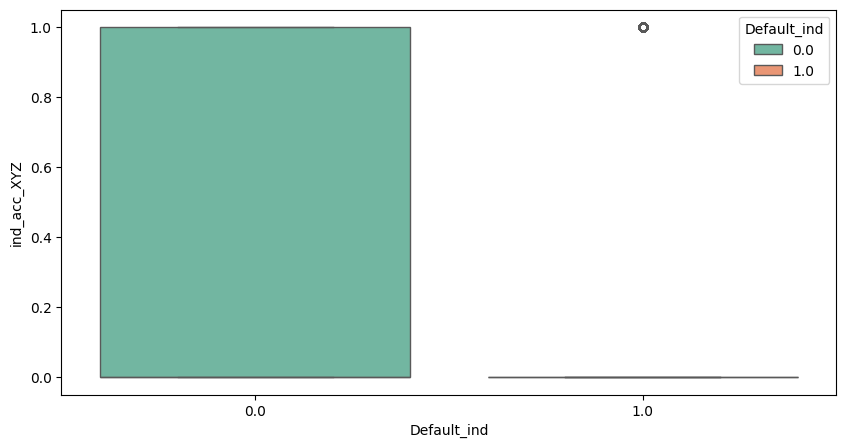

In [6]:
plt.rcParams['figure.figsize']= (10,5)
sns.boxplot(data=train, x='Default_ind', y='ind_acc_XYZ', palette="Set2", hue='Default_ind')

In [7]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(train['States'], train['Default_ind'])

# Perform the chi-square test to check cat-cat variables
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 3.684108699422308
P-value: 0.7193352759645408
Degrees of freedom: 6
Expected frequencies table:
[[2203.14499668  187.85500332]
 [2201.30213177  187.69786823]
 [2154.30907664  183.69092336]
 [2169.05199589  184.94800411]
 [2172.73772571  185.26227429]
 [2198.53783441  187.46216559]
 [2158.9162389   184.0837611 ]]


### This proves that the 'States' feature has no useful information and hence can be removed. (the p-value indicates there is not enough information to reject the hypothesis that there is no association)

In [8]:
def correlation_test(df, thresh = 0.8):
    columns = df.columns
    a = []
    for col1 in columns:
        for col2 in columns:
            if col1 < col2:
                cor = df[col1].corr(df[col2])
                if(cor > thresh or cor < -thresh):
                    #print(col1, col2, cor)
                    a.append(col1)
    return a

## Modelling the data
### Making a Model class

In [9]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

class Model:
    def __init__(self, model_class, trainset, testset, y='Default_ind', smote = False, thresh = 0.6, scale = False):
        self.scaler = StandardScaler()
        self.model = model_class
        self.y = y
        self.scale = scale

        X_train, y_train = self.simple_preprocessing(trainset)
        self.droppable_columns = correlation_test(X_train, thresh)
        if(smote == True): 
            X_train, y_train = self.resample(X_train, y_train)
        
        self.train(X_train, y_train)
        self.test(testset)
    
    def resample(self, X, Y):
        sm = SMOTE(random_state=42)
        X_resampled, y_resampled = sm.fit_resample(X, Y)
        return X_resampled, y_resampled
    
    def simple_preprocessing(self, df):
        if(self.scale):
            df.dropna(axis=0, inplace=True)

        if 'States' in df.columns:
            df.drop('States', axis = 1, inplace=True)

        X_train = df.drop(self.y, axis = 1)
        y_train = df[self.y]
        return X_train, y_train
    
    def preprocess(self, X):
        X.drop(labels=self.droppable_columns, axis = 1, inplace=True)
        return X
        
    def train(self, X_train, y_train):
        X_train = self.preprocess(X_train)
        if(self.scale):
            X_train = self.scaler.fit_transform(X_train)
        if issubclass(self.model.__class__, xgb.XGBClassifier):
            dtrain = xgb.DMatrix(X_train, label=y_train)
            self.model = xgb.train(self.model.get_params(), dtrain, num_boost_round=132)
        else:
            self.model.fit(X_train, y_train.values.ravel())



    def test(self, testset):
        X_test, y_test = self.simple_preprocessing(testset)
        X_test = self.preprocess(X_test)
        if(self.scale):
            X_test = self.scaler.transform(X_test)
        if issubclass(self.model.__class__, xgb.Booster):
            dtest = xgb.DMatrix(X_test)
            y_pred = self.model.predict(dtest)
        else:
            y_pred = self.model.predict(X_test)

        binary_predictions = [1 if p > 0.5 else 0 for p in y_pred]

        self.accuracy = accuracy_score(y_test, binary_predictions)
        self.report = classification_report(y_test, binary_predictions)
        self.c_matrix = confusion_matrix(y_test, binary_predictions)

        if issubclass(self.model.__class__, xgb.Booster):
            # For XGBoost, use the predicted probabilities directly
            self.fpr, self.tpr, _ = roc_curve(y_test, y_pred)
            self.auroc = roc_auc_score(y_test, y_pred)
        else:
            # For other models, use the decision function or predicted probabilities
            if hasattr(self.model, 'decision_function'):
                y_score = self.model.decision_function(X_test)
            else:
                y_score = self.model.predict_proba(X_test)[:, 1]
            self.fpr, self.tpr, _ = roc_curve(y_test, y_score)
            self.auroc = roc_auc_score(y_test, y_score)

    def get_model(self):
        return self.model
    
    def all_stats(self):
        print(f"{self.model.__class__.__name__} Model")
        print("Accuracy:", self.accuracy)
        print("Classification Report:\n", self.report)
        print("AUROC:", self.auroc)
        print("Confusion Matrix:")

        # Create subplots
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))

        # Plot AUROC
        axs[0].plot(self.fpr, self.tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(self.auroc))
        axs[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        axs[0].set_xlabel('False Positive Rate')
        axs[0].set_ylabel('True Positive Rate')
        axs[0].set_title('Receiver Operating Characteristic (ROC) Curve')
        axs[0].legend(loc='lower right')

        # Plot Confusion Matrix
        if issubclass(self.model.__class__, xgb.Booster):
            classes = [0, 1]
            disp = ConfusionMatrixDisplay(confusion_matrix=self.c_matrix, display_labels=classes)
        else:
            disp = ConfusionMatrixDisplay(confusion_matrix=self.c_matrix, display_labels=self.model.classes_)
        disp.plot(ax=axs[1], cmap='Blues', values_format='d')
        axs[1].set_title('Confusion Matrix')

        plt.show()

    def res(self):
        print("Accuracy:", self.accuracy)
        print("AuROC", self.auroc)

## Models for comparison

### Logistic Regression

LogisticRegression Model
Accuracy: 0.8552365547917509
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      2290
         1.0       0.27      0.57      0.37       183

    accuracy                           0.86      2473
   macro avg       0.62      0.73      0.64      2473
weighted avg       0.91      0.86      0.88      2473

AUROC: 0.810788173813444
Confusion Matrix:


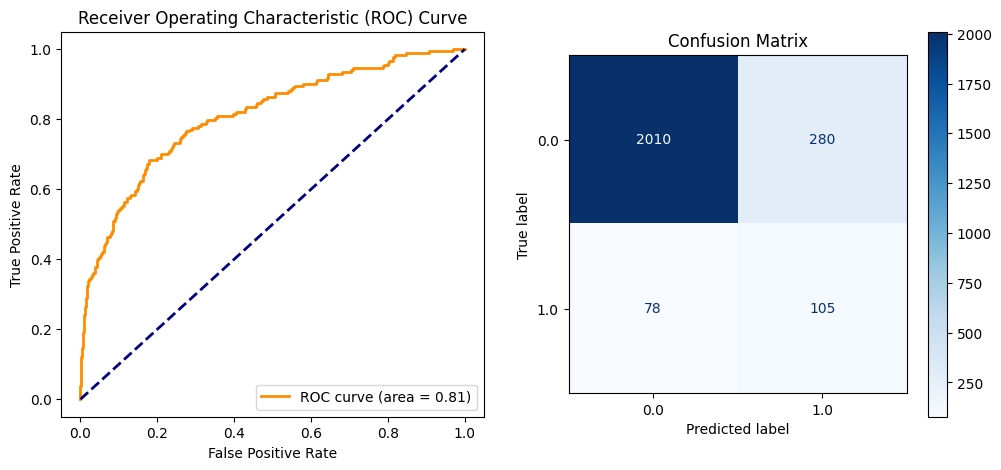

In [10]:
from sklearn.linear_model import LogisticRegression

train = pd.read_csv("https://raw.githubusercontent.com/mh2t/DS5110/main/Homework/HW4-Train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/mh2t/DS5110/main/Homework/HW4-Validation.csv")

model = Model(LogisticRegression(), trainset = train, testset = test, y = 'Default_ind', smote=True, thresh = 0.75, scale = True)
model.all_stats()

In [11]:
# Test logistic regression here
x = input("Enter file name: ")
if(x == ''):
    x = "https://raw.githubusercontent.com/mh2t/DS5110/main/Homework/HW4-Validation.csv"
test = pd.read_csv(x)
model.test(test)
model.res()

Accuracy: 0.8552365547917509
AuROC 0.810788173813444


### Random Forest Classifier

RandomForestClassifier Model
Accuracy: 0.9397492923574605
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      2290
         1.0       0.76      0.27      0.40       183

    accuracy                           0.94      2473
   macro avg       0.85      0.63      0.68      2473
weighted avg       0.93      0.94      0.93      2473

AUROC: 0.8460674827594434
Confusion Matrix:


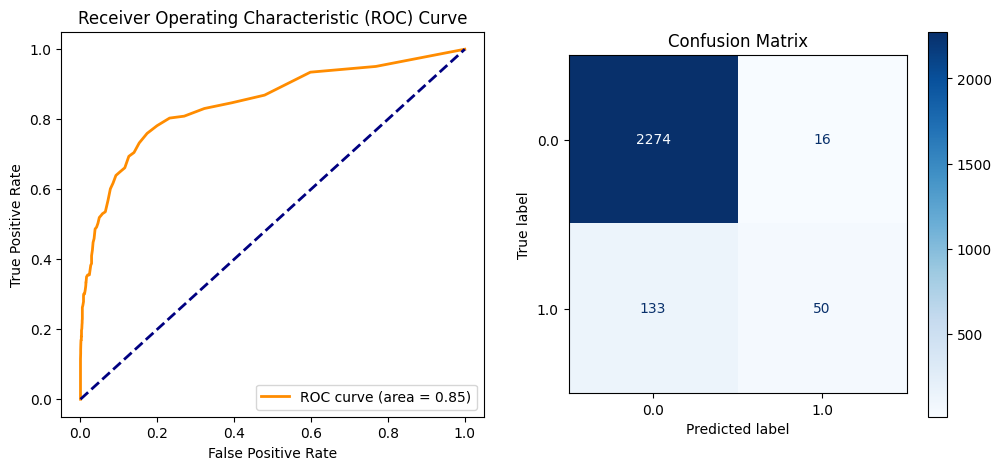

In [12]:
from sklearn.ensemble import RandomForestClassifier

train = pd.read_csv("https://raw.githubusercontent.com/mh2t/DS5110/main/Homework/HW4-Train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/mh2t/DS5110/main/Homework/HW4-Validation.csv")

rmodel = Model(RandomForestClassifier(n_estimators=100), trainset = train, testset = test, y = 'Default_ind', thresh = 0.9, scale = True)
rmodel.all_stats()

In [13]:
# Test random forest classifier here
x = input("Enter file name: ")
if(x == ''):
    x = "https://raw.githubusercontent.com/mh2t/DS5110/main/Homework/HW4-Validation.csv"
test = pd.read_csv(x)
rmodel.test(test)
rmodel.res()

Accuracy: 0.9397492923574605
AuROC 0.8460674827594434


### XGBoost model

Booster Model
Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      2778
         1.0       0.47      0.56      0.51       222

    accuracy                           0.92      3000
   macro avg       0.72      0.75      0.73      3000
weighted avg       0.93      0.92      0.92      3000

AUROC: 0.8670360425220036
Confusion Matrix:


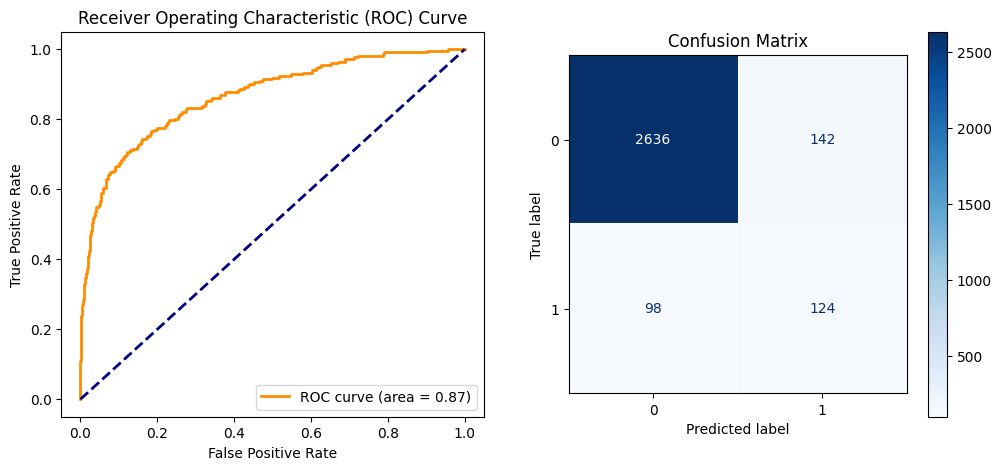

In [14]:
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

train = pd.read_csv("https://raw.githubusercontent.com/mh2t/DS5110/main/Homework/HW4-Train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/mh2t/DS5110/main/Homework/HW4-Validation.csv")

xgb_model = Model(xgb.XGBClassifier(max_depth= 3, eta= 0.2, objective= 'binary:logistic', scale_pos_weight=5), trainset = train, testset = test, y = 'Default_ind', thresh = 0.9)
xgb_model.all_stats()

In [15]:
# Test xgboost here
x = input("Enter file name: ")
if(x == ''):
    x = "https://raw.githubusercontent.com/mh2t/DS5110/main/Homework/HW4-Validation.csv"
test = pd.read_csv(x)
xgb_model.test(test)
xgb_model.res()

Accuracy: 0.92
AuROC 0.8670360425220036


# Final Results

|Model Name|Model Accuracy|Model AuROC|
|----------|----------|-----------|
|Baseline Model|0.9332794177112819|0.584374925430119|
|Linear Regression|0.8552365547917509|0.810788173813444|
|Random Forest|0.9413667610190053|0.83105447777221|
|XGBoost|0.9276182773958754|0.8669840360798913|

## Thus, according to the above findings, I would suggest the XGBoost Model for training the data.